In [11]:
import numpy as np                              
from numpy.linalg import inv                   
import matplotlib.pyplot as plt                 
from scipy.stats import multivariate_normal
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import mixture

In [5]:
data = 'data/penguins.csv'
df = pd.read_csv(data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [6]:

df["bill_length_mm"] = df["bill_length_mm"].fillna(value = df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(value = df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [7]:
X = df.drop(['sex', 'species', 'island'], axis = 1)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000
340,43.50000,18.10000,202.000000,3400.000000
341,49.60000,18.20000,193.000000,3775.000000
342,50.80000,19.00000,210.000000,4100.000000


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Wi

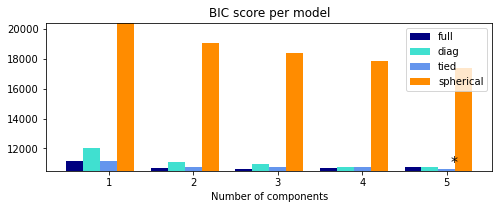

In [82]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture



lowest_bic = np.infty
bic = []
n_components_range = range(1, 6)
cv_types = ["full", "diag", "tied", "spherical"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)


plt.show()

In [ ]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=6, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")



plt.show()

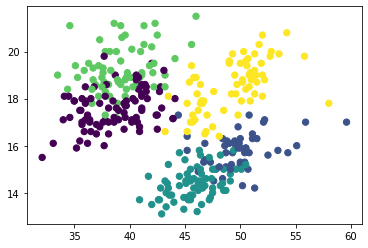

In [73]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='tied').fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis');
probs = gmm.predict_proba(X)

In [72]:
gmm.converged_

True

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    gmm = GaussianMixture(n_components=i, covariance_type='full').fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.grid()
plt.show()

In [56]:
K = X.values
gmm = mixture.GaussianMixture(
            n_components=6, covariance_type='spherical'
        )
model = gmm.fit(K)
model.covariances_.shape


(6,)

C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Wi

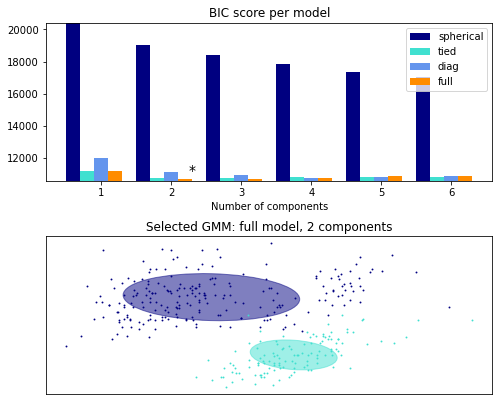

In [85]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture



lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type, max_iter = 600, tol = 0.01
        )
        gmm.fit(K)
        bic.append(gmm.bic(K))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(K)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(K[Y_ == i, 0], K[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

In [8]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000
340,43.50000,18.10000,202.000000,3400.000000
341,49.60000,18.20000,193.000000,3775.000000
342,50.80000,19.00000,210.000000,4100.000000


In [9]:
X.values

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

For n_clusters = 2 The average silhouette_score is : 0.5529616006166657
For n_clusters = 3 The average silhouette_score is : 0.273291224211805
For n_clusters = 4 The average silhouette_score is : 0.37705203852947766
For n_clusters = 5 The average silhouette_score is : 0.29673570782638414


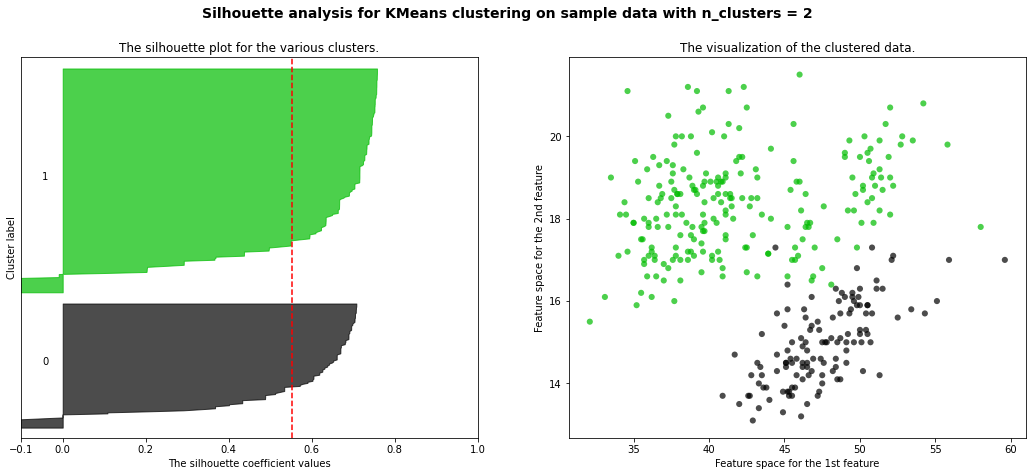

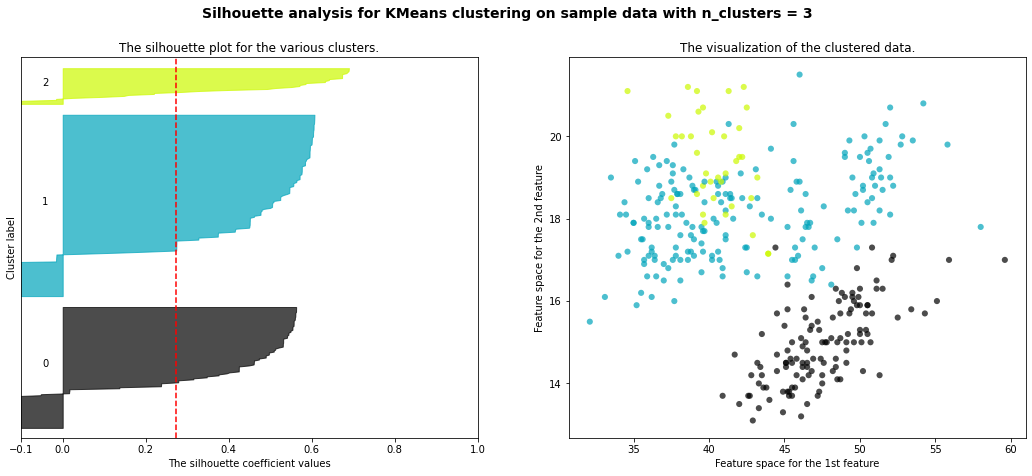

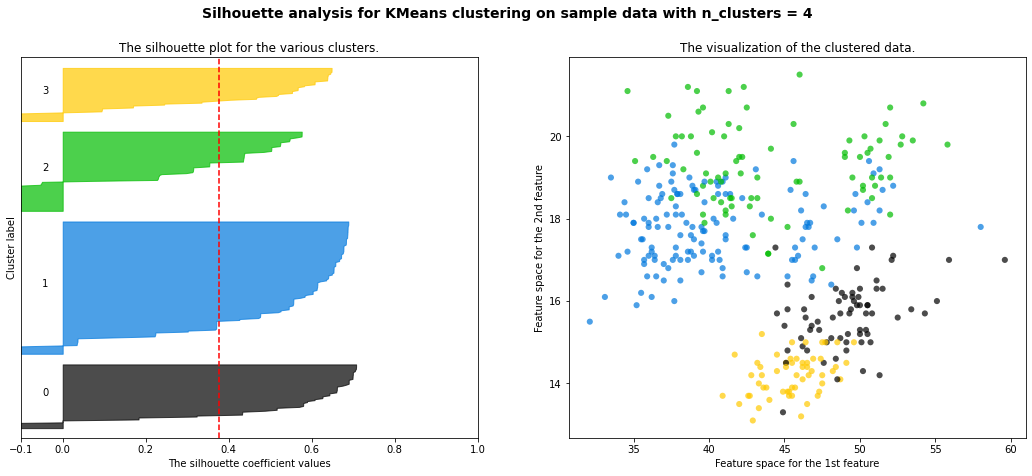

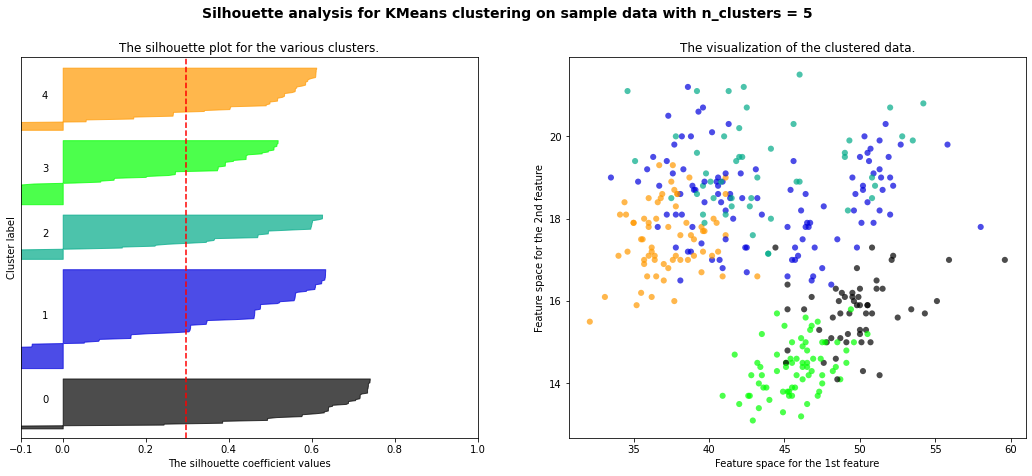

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components=n_clusters, random_state=10, max_iter = 300, covariance_type='full', tol = 0.01)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['bill_length_mm'], X['bill_depth_mm'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )




    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [97]:
from sklearn import mixture

In [13]:
EM = mixture.GaussianMixture(n_components=2, random_state=10, max_iter = 300, covariance_type='full', tol = 0.01)

In [14]:
model = EM.fit(X)

In [15]:
model.means_.shape

(2, 4)

In [16]:
model.score_samples(X)

array([-15.25124515, -14.61748856, -14.89372211, -16.71197859,
       -15.55916586, -16.72459362, -14.91593211, -16.78015125,
       -15.30147952, -15.46141374, -14.29897368, -15.66327327,
       -14.86932417, -17.96429293, -18.9605194 , -14.38688032,
       -15.03868148, -16.03115449, -14.99985594, -17.39425801,
       -17.10321829, -15.34638503, -14.71404462, -14.83112675,
       -16.22004337, -14.71365258, -14.59813504, -14.32357863,
       -18.48980568, -16.31059697, -15.93626666, -16.67081141,
       -14.01922462, -14.88316611, -15.6510542 , -16.973043  ,
       -15.06882026, -15.61933863, -16.25329259, -19.01544129,
       -14.98409298, -13.8299997 , -15.51578793, -14.86132551,
       -15.03169785, -17.096543  , -15.38554395, -17.27251339,
       -14.30875639, -16.96605027, -13.91495511, -15.44605306,
       -14.56125034, -14.61284769, -16.49057174, -13.59757866,
       -14.02765352, -13.7029815 , -15.77084308, -14.48657805,
       -14.82237495, -16.65518212, -14.68518431, -14.16

In [17]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [103]:
X.shape

(344, 4)

In [18]:
samples = model.sample(n_samples=344)
samples

(array([[  40.8895142 ,   13.67532176,  208.59517686, 4407.515289  ],
        [  47.50946047,   14.84847105,  217.53139974, 4764.03208081],
        [  48.51199432,   15.8013442 ,  217.72719686, 5073.85120141],
        ...,
        [  44.18072228,   19.68939118,  195.18727789, 4099.67615056],
        [  38.8572257 ,   18.70867317,  199.76178545, 4154.83006751],
        [  47.96401043,   19.08193941,  200.24892175, 4203.65143646]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
data = pd.DataFrame(samples[0], columns = ['f1','f2','f3','f4'])
labels = pd.DataFrame(samples[1], columns = ['labels'])

In [20]:
data

,f1,f2,f3,f4
0,40.889514,13.675322,208.595177,4407.515289
1,47.509460,14.848471,217.531400,4764.032081
2,48.511994,15.801344,217.727197,5073.851201
3,48.870866,15.652151,216.746550,5560.585985
4,52.756313,15.239390,221.067783,5646.662397
...,...,...,...,...
339,38.316943,17.200378,196.431195,3542.900989
340,43.183031,19.491050,192.211746,3948.998808
341,44.180722,19.689391,195.187278,4099.676151
342,38.857226,18.708673,199.761785,4154.830068


In [21]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
339,1
340,1
341,1
342,1


In [22]:
X['f1'] = data['f1']
X['f2'] = data['f2']
X['f3'] = data['f3']
X['f4'] = data['f4']
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,f1,f2,f3,f4
0,39.10000,18.70000,181.000000,3750.000000,40.889514,13.675322,208.595177,4407.515289
1,39.50000,17.40000,186.000000,3800.000000,47.509460,14.848471,217.531400,4764.032081
2,40.30000,18.00000,195.000000,3250.000000,48.511994,15.801344,217.727197,5073.851201
3,43.92193,17.15117,200.915205,4201.754386,48.870866,15.652151,216.746550,5560.585985
4,36.70000,19.30000,193.000000,3450.000000,52.756313,15.239390,221.067783,5646.662397
...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,38.316943,17.200378,196.431195,3542.900989
340,43.50000,18.10000,202.000000,3400.000000,43.183031,19.491050,192.211746,3948.998808
341,49.60000,18.20000,193.000000,3775.000000,44.180722,19.689391,195.187278,4099.676151
342,50.80000,19.00000,210.000000,4100.000000,38.857226,18.708673,199.761785,4154.830068


In [23]:
X['labels'] = labels

In [24]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,f1,f2,f3,f4,labels
0,39.10000,18.70000,181.000000,3750.000000,40.889514,13.675322,208.595177,4407.515289,0
1,39.50000,17.40000,186.000000,3800.000000,47.509460,14.848471,217.531400,4764.032081,0
2,40.30000,18.00000,195.000000,3250.000000,48.511994,15.801344,217.727197,5073.851201,0
3,43.92193,17.15117,200.915205,4201.754386,48.870866,15.652151,216.746550,5560.585985,0
4,36.70000,19.30000,193.000000,3450.000000,52.756313,15.239390,221.067783,5646.662397,0
...,...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,38.316943,17.200378,196.431195,3542.900989,1
340,43.50000,18.10000,202.000000,3400.000000,43.183031,19.491050,192.211746,3948.998808,1
341,49.60000,18.20000,193.000000,3775.000000,44.180722,19.689391,195.187278,4099.676151,1
342,50.80000,19.00000,210.000000,4100.000000,38.857226,18.708673,199.761785,4154.830068,1


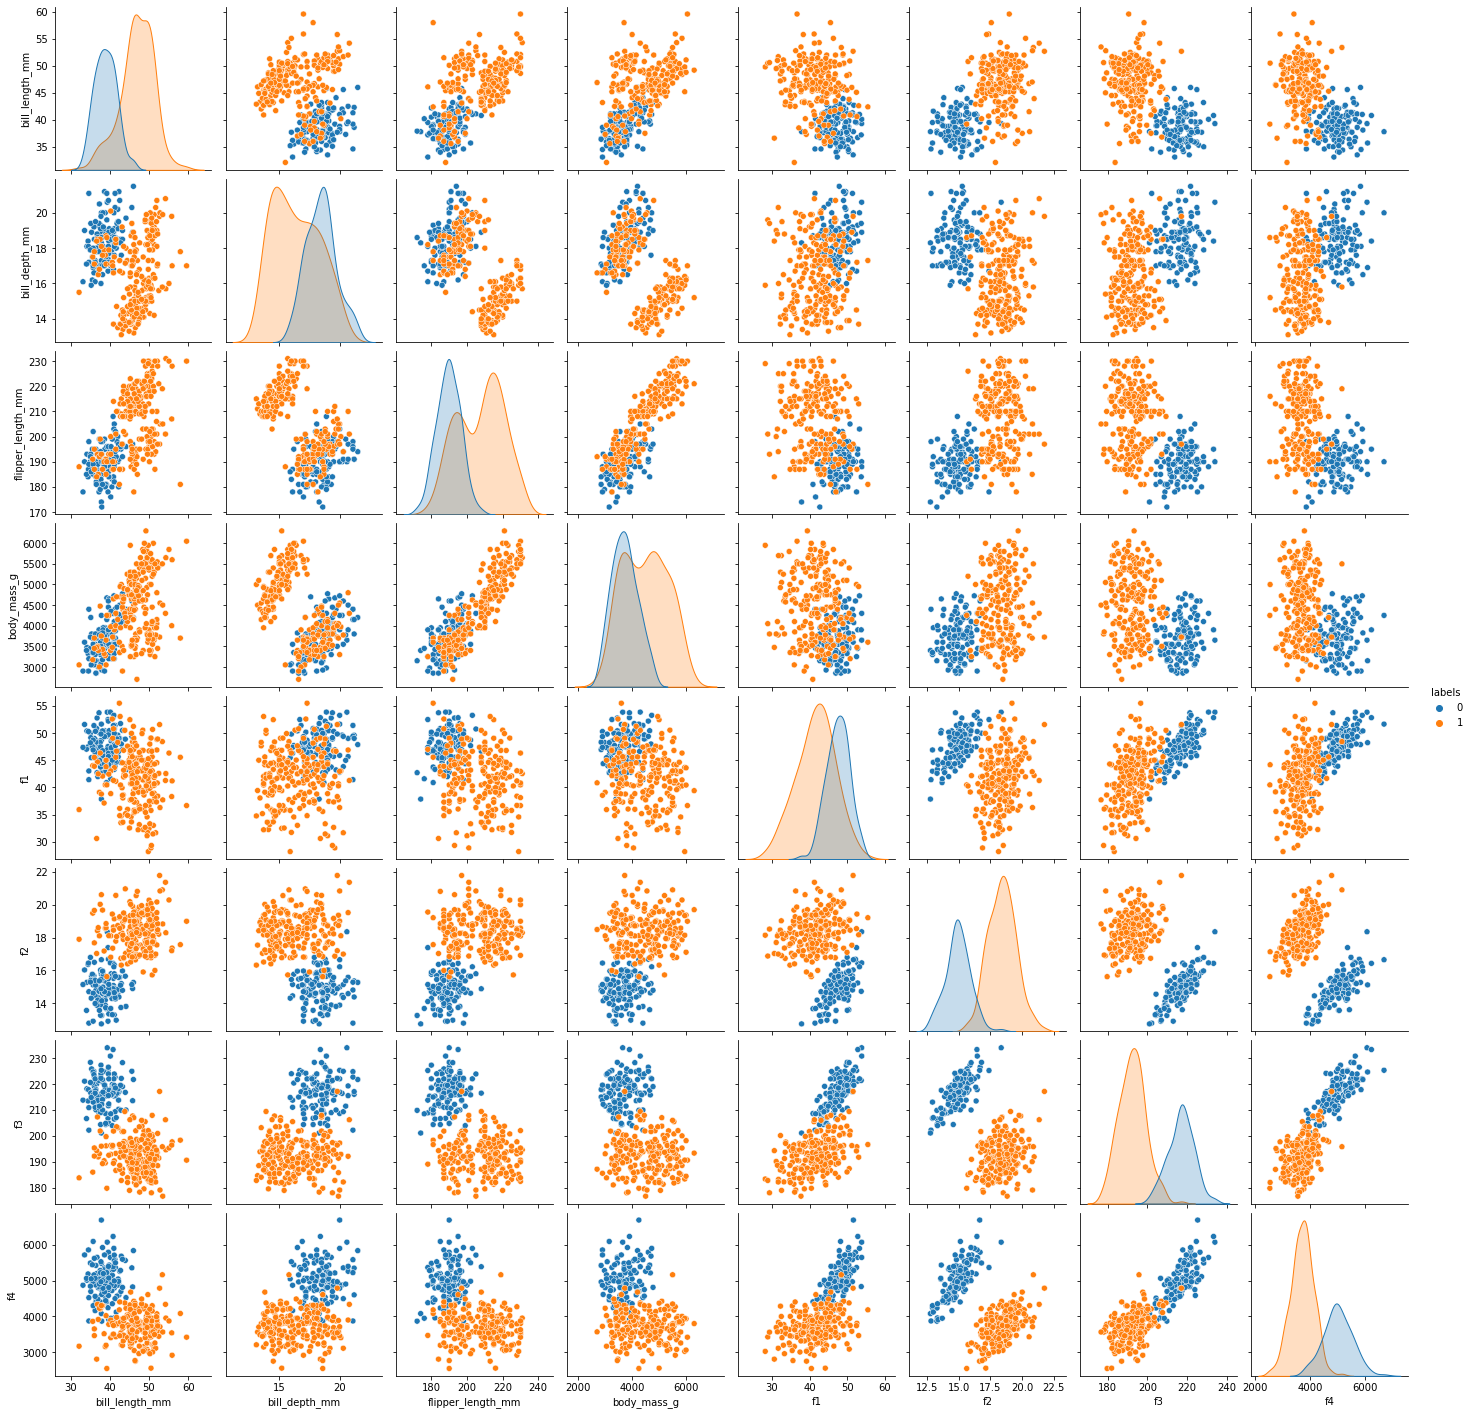

In [25]:
sns.pairplot(X, hue = 'labels')
plt.show()

In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [28]:
y = X['labels']
X = X.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(344, 8)
(344,)


In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(240, 8)
(104, 8)


In [30]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.7313 - accuracy: 0.5521 - val_loss: 0.6402 - val_accuracy: 0.5208
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7031 - val_loss: 0.5511 - val_accuracy: 0.6667
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7917 - val_loss: 0.4823 - val_accuracy: 0.7500
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8594 - val_loss: 0.4498 - val_accuracy: 0.7917
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8490 - val_loss: 0.3442 - val_accuracy: 0.8125
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8385 - val_loss: 0.3190 - val_accuracy: 0.8542
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8438 - val_loss: 0.3484 - val_accuracy: 0.8125
Epoch 8/100


In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.2170560359954834, 0.8942307829856873]

In [33]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.8942307829856873
Test loss: 0.2170560359954834


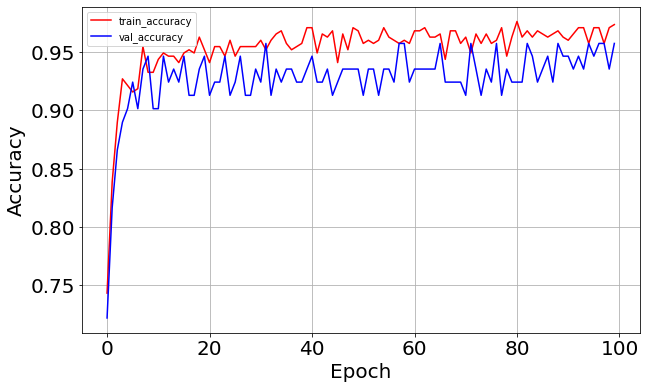

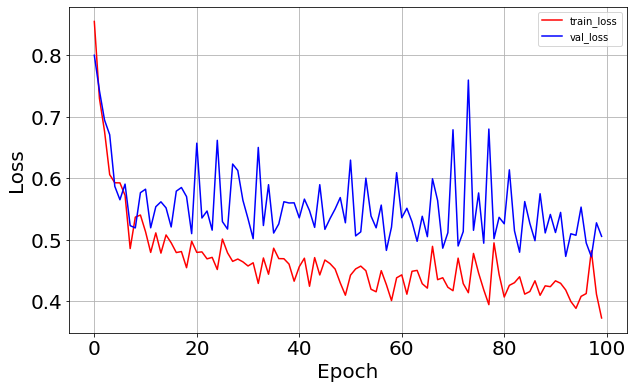

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)